<a href="https://colab.research.google.com/github/yustiks/statistics_in_python/blob/master/dz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Центральная предельная теорема. 

Как применить законы статистики к данным ? 
Сколько элементов сумм использовано в коде?

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import seaborn as sns
%matplotlib inline
import numpy.linalg as la

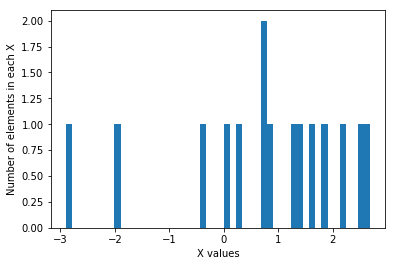

In [6]:
number_of_sums = 15
number_of_randoms = 10
X1 = np.zeros((number_of_sums, 1))
for i in range(number_of_sums):
  X1[i,0] = np.sum(np.random.rand(number_of_randoms,1)) - np.sum(np.random.rand(number_of_randoms,1))
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

# Матрица ковариаций

Чему равна матрица ковариаций для графика?

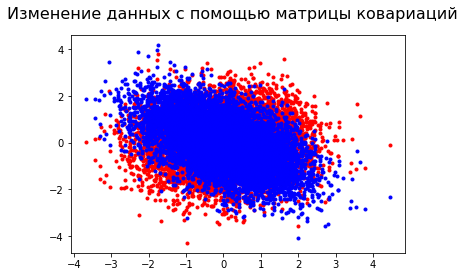

In [8]:
import numpy.linalg as la
n = 10000
C = [[1,-0.5],[-0.5,1]]
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16)  
plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')

# Разброс данных 2 способами: теоритически и практически

Построить преобразование с помощью вычисленной выше матрицей

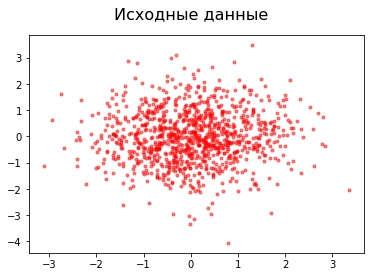

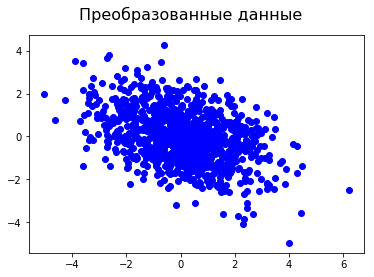

In [30]:
mu, sigma = 0, 1 # mean and standard deviation
# x = np.random.normal(mu, sigma, 100)
x = np.matrix(np.random.normal(0, 1, size=(1000, 2)))
v
a = np.linalg.cholesky(c)
y = x * a
plt.suptitle('Исходные данные', fontsize=16) 
plt.plot(x[:, 0], x[:, 1], linestyle='None', color="red", marker=".", alpha=0.5) 
plt.show()
plt.suptitle('Преобразованные данные', fontsize=16) 
plt.plot(y[:, 0], y[:, 1], linestyle='None', color="blue", marker="o", alpha=1)
plt.show()

## Посчитать угол наклона полученного распределения (визуально) в радианах и посчитать разброс данных теоритически и практически

In [31]:
i = 135*3.14/180
theta = i
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp = y*u
var_empirical = np.var(yp)
var_theoretical = np.transpose(u)*c*u
print('генерация данных: ', var_empirical)
print('теоритический подсчет: ', var_theoretical)


генерация данных:  2.8066336216530554
теоритический подсчет:  [[2.99999715]]


При  большом количестве данных эти показатели должны быть равны. Достаточно ли мы данных сгенерировали? No

Посчитать как меняется вариация в зависимости от выбора собственного вектора

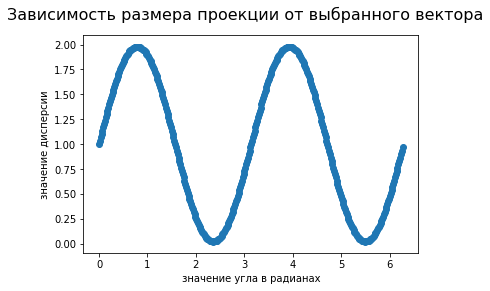

In [40]:
degrees360 = [2*math.pi/360*i for i in range(360)]
variances = []
# c =  np.matrix('1 0.98; 0.98 1')
for i in degrees360:
    theta = i
    u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
    yp = y*u
    var_empirical = np.var(yp)
    var_theoretical = np.transpose(u)*c*u
    variances.append(var_theoretical)

plt.suptitle('Зависимость размера проекции от выбранного вектора', fontsize=16)    
plt.xlabel('значение угла в радианах')
plt.ylabel('значение дисперсии')
plt.scatter(degrees360, variances)
plt.show()

# Работа с данными данные

Загрузить таблицу. 

In [44]:
import io
import requests
# url="http://yustiks.ru/avocado.csv"
# url = pd.read_csv('avocado.csv')
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Построить корелляцию для всех типов авокадо (их там три). Построить графики histograms и плотность распределения (смотрим примеры из лекций).

In [46]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', '4225', '4770']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1         2
0 -0.999909 -0.994680 -0.999962
1 -0.999941 -0.995639 -0.999954
2 -0.999930 -0.989336 -0.999898
3 -0.999900 -0.992968 -0.999943
4 -0.999917 -0.995717 -0.999940


корелляциям между '_4046', '_4225' и '_4770',

In [47]:
_4046 = df_norm[0]
_4225 = df_norm[1]
_4770 = df_norm[2]
# plt.figure(figsize=(15,10)) # размер графика
# plt.xlim((-1, -0.5))
# plt.ylim((-1, -0.5))
# plt.plot(_4046, _4225,'r.')

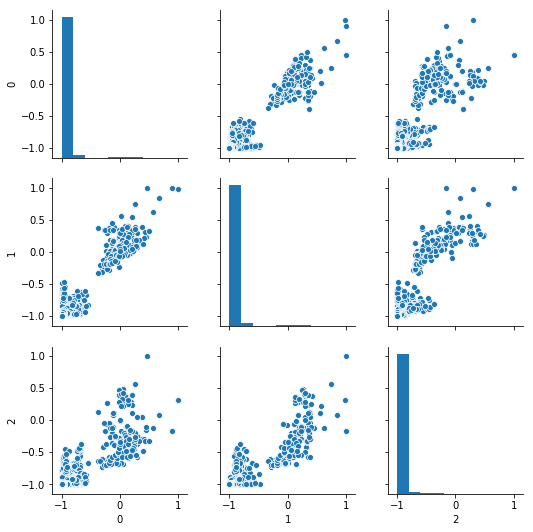

In [48]:
sns.pairplot(df_norm)

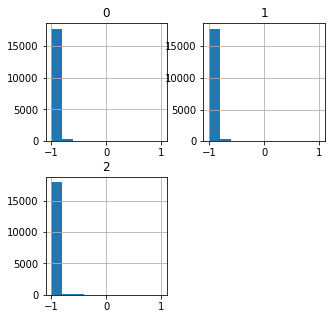

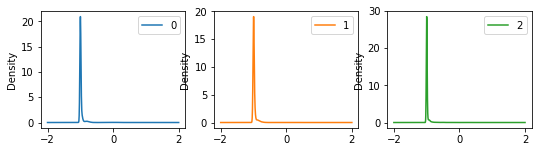

In [49]:
df_norm.hist(figsize=(5,5))
plt.show()

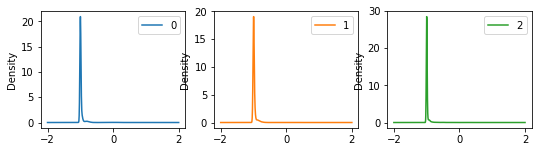

In [90]:
df_norm.plot(kind="density", layout=(6,5), 
             subplots=True,sharex=False, sharey=False, figsize=(15,15))
plt.show()

Посчитать матрицу ковариаций. Как из нее получить собственные вектора и собственные числа?

In [103]:
# посчитать ковариацию переменных (разброс относительно друг друга)
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# матрица ковариаций
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

X = np.vstack((_4225, _4046))

# считаем матрицу ковариаций для вектора X
cov_mat(X.T) # (or with np.cov(X.T))

array([[1.36719418e-05, 1.12478035e-05],
       [1.12478035e-05, 9.25348315e-06]])

In [50]:
df_norm.corr()

,0,1,2
0,1.000000,0.926110,0.833389
1,0.926110,1.000000,0.887855
2,0.833389,0.887855,1.000000


In [52]:
w,v = la.eig(df_norm.corr())
print(w) #собственные числа?
print(v) #собственный вектор?

[2.76544627 0.17115766 0.06339607]
[[-0.57634639 -0.6019748   0.55267638]
 [-0.58783414 -0.16442044 -0.79209654]
 [-0.56769345  0.78140403  0.25909821]]


# Поиск собственного вектора

1.9261099558992305 [0.70710678 0.70710678]


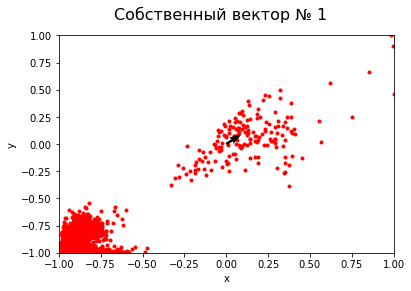

0.07389004410076949 [-0.70710678  0.70710678]


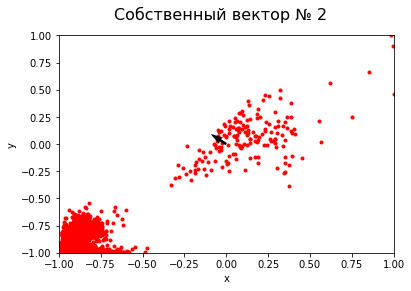

In [122]:
import numpy.linalg as la
Cb = df_norm[[0,1]].corr()

w,v = la.eig(Cb)

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(X[0,:], X[1,:], 'r.', zorder=1)
    plt.axis([-1,1,-1,1])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', zorder=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Линейное преобразование значений (проекция на ось).

На какую прямую проецируем?

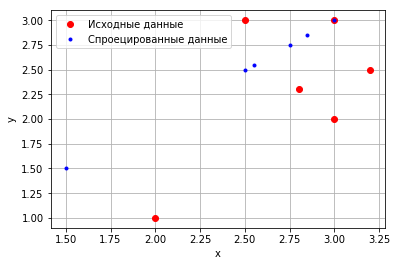

In [149]:
Xc = np.array([[2,1],[3,2],[3,3],[2.5,3],[2.8,2.3],[3.2,2.5]])
 # проецирование на какую прямую
P = np.array([[.5,.5],[.5,.5]]) 
Xp = np.dot(Xc,P)


plt.plot(Xc[:,0], Xc[:,1], 'ro', label="Исходные данные")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Спроецированные данные")
#plt.axis([0,4,0,4])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

# Теория вероятности

Напишите код для моделирования 100 подбрасываний игрального кубика. Начертите диаграму histogram. 

[5 5 3 4 5 3 5 5 1 2 4 6 1 4 5 6 5 4 5 2 1 6 6 5 5 1 2 3 3 1 4 6 1 1 4 6 6
 1 1 2 2 5 2 1 1 5 5 3 1 4 3 2 3 4 1 6 1 4 2 3 4 2 1 5 5 6 3 5 3 3 2 5 2 5
 1 1 1 1 5 3 6 6 4 4 4 3 5 2 3 4 5 1 2 3 4 1 5 5 4 6]


(array([21., 13., 15., 16., 23., 12.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

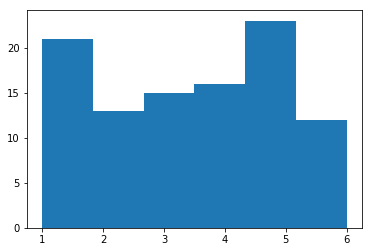

In [249]:
# np.random.seed(422)
low = 1
up = 7
size = 100
x = np.random.randint(low, up, size=100)
print(x)
plt.hist(x, bins=6)